In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ziya07/intelligent-classroom-dataset/data")

Skipping, found downloaded files in "./intelligent-classroom-dataset" (use force=True to force download)


In [ ]:
import pandas as pd
df = pd.read_csv("/content/intelligent-classroom-dataset/intelligent_classroom_categorical_dataset.csv")

In [ ]:
data.head()

,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category
0,1,16,8.28,Speaking,Hard,224,54,0.77,3,Vocabulary,Improve pronunciation.,Listening → Speaking → Writing,23.41,Low
1,1,13,7.65,Speaking,Easy,472,76,-0.54,0,Pronunciation,Practice grammar rules.,Writing → Reading → Listening,31.58,Low
2,1,14,5.74,Writing,Easy,332,53,0.41,6,Grammar,Improve pronunciation.,Writing → Reading → Listening,24.91,Low
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium
4,1,12,2.00,Reading,Medium,150,62,-0.76,1,Grammar,Improve pronunciation.,Listening → Speaking → Writing,25.39,Low


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
n = len(df)
print(f"\n5. Jumlah data pada datasets (n): {n}")


5. Jumlah data pada datasets (n): 5000


In [ ]:
num_kolom = df.shape[1]
print(f"\n6. Jumlah kolom pada datasets: {num_kolom}")


6. Jumlah kolom pada datasets: 14


In [ ]:
end_index_7 = n - 300
if end_index_7 < 150:
    print(f"\n7. WARNING: Indeks akhir ({end_index_7}) lebih kecil dari indeks awal (150). Tidak bisa melakukan filtering.")
else:
    df_filtered_7 = df.iloc[150:end_index_7]
    print(f"\n7. Hasil Filter Data (Indeks 150 s.d {end_index_7}):")
    print(f"Jumlah Baris Hasil Filter: {len(df_filtered_7)}")
    print(df_filtered_7.head())


7. Baik, ini dia hasil filtering data dari indeks 150 sampai 4700:
Total ada 4550 baris data yang ditemukan setelah filtering ini.
     student_id  age  engagement_level  task_type task_difficulty  \
150          16   12              2.09    Grammar          Medium   
151          16   12              3.69  Listening            Easy   
152          16   10              3.70    Reading          Medium   
153          16   12              0.52    Grammar          Medium   
154          16   14              7.68    Grammar            Hard   

     time_spent_on_task  accuracy_of_responses  emotion_score  \
150                 182                     56          -0.28   
151                 268                     89           0.44   
152                 219                     92           0.20   
153                 115                     77           0.02   
154                  50                     51           0.97   

     frustration_level      skill_gap   personalized_feedback 

In [ ]:
end_index_8 = n - 150
kolom_pilihan = ['age', 'time_spent_on_task', 'accuracy_of_responses']

if end_index_8 < 200:
     print(f"\n8. WARNING: Indeks akhir ({end_index_8}) lebih kecil dari indeks awal (200). Tidak bisa melakukan filtering.")
elif not all(col in df.columns for col in kolom_pilihan):
    print(f"\n8. ERROR: Pastikan kolom pilihan ({kolom_pilihan}) ada di dataset.")
else:
    df_filtered_8 = df.loc[200:end_index_8, kolom_pilihan]
    print(f"\n8. Hasil Filter Data dan Kolom (Indeks 200 s.d {end_index_8}, Kolom: {kolom_pilihan}):")
    print(f"Jumlah Baris Hasil Filter: {len(df_filtered_8)}")
    print(df_filtered_8.head())


8. Hasil Filter Data dan Kolom (Indeks 200 s.d 4850, Kolom: ['age', 'time_spent_on_task', 'accuracy_of_responses']):
Jumlah Baris Hasil Filter: 4651
     age  time_spent_on_task  accuracy_of_responses
200   16                  70                     88
201   17                 597                     98
202   16                 442                     81
203   10                 444                     60
204   13                 478                     96


In [ ]:
df_sliced_new = df[
    (df['progress_category'] == 'Medium') &
    (df['age'] >= 15)
]

print(f"\nHasil Slicing Data (Kriteria: progress_category == 'Medium' DAN age >= 15):")
print(f"Jumlah Baris Hasil Slicing: {len(df_sliced_new)}")
display(df_sliced_new.head())


Hasil Slicing Data (Kriteria: progress_category == 'Medium' DAN age >= 15):
Jumlah Baris Hasil Slicing: 281


,student_id,age,engagement_level,task_type,task_difficulty,time_spent_on_task,accuracy_of_responses,emotion_score,frustration_level,skill_gap,personalized_feedback,optimized_learning_path,learning_progress,progress_category
3,1,16,9.56,Grammar,Medium,77,96,-0.21,9,Grammar,Practice grammar rules.,Writing → Reading → Listening,41.41,Medium
11,2,16,8.83,Speaking,Medium,400,63,0.88,6,NaN,Good progress.,Listening → Speaking → Writing,41.16,Medium
14,2,17,6.27,Reading,Medium,260,86,0.48,2,Grammar,Focus on synonyms.,Reading → Grammar → Speaking,48.47,Medium
41,5,16,7.66,Writing,Hard,422,99,0.15,1,Vocabulary,Good progress.,Writing → Reading → Listening,50.97,Medium
61,7,16,7.07,Grammar,Medium,506,97,0.75,9,Pronunciation,Good progress.,Writing → Reading → Listening,46.90,Medium


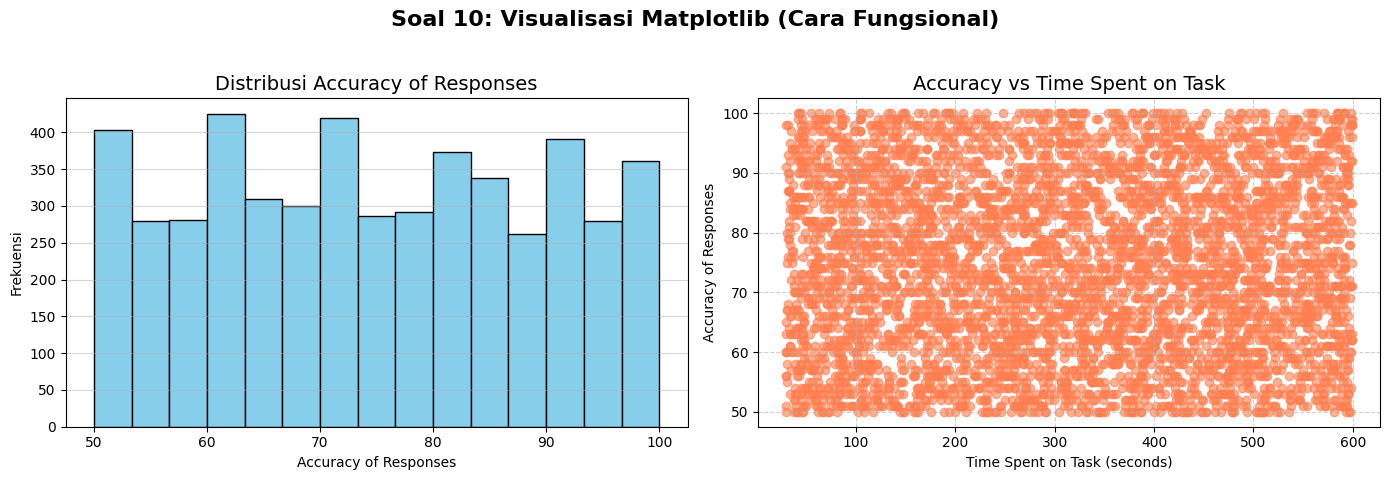

In [ ]:
plt.figure(figsize=(14, 5))

# GRAFIK 1: Distribusi Akurasi Respon
plt.subplot(1, 2, 1)
plt.hist(df['accuracy_of_responses'].dropna(), bins=15, color='skyblue', edgecolor='black')
plt.title('Distribusi Accuracy of Responses', fontsize=14)
plt.xlabel('Accuracy of Responses')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.5)

# GRAFIK 2: Hubungan Waktu dan Akurasi
plt.subplot(1, 2, 2)
plt.scatter(df['time_spent_on_task'], df['accuracy_of_responses'], alpha=0.6, color='coral')
plt.title('Accuracy vs Time Spent on Task', fontsize=14)
plt.xlabel('Time Spent on Task (seconds)')
plt.ylabel('Accuracy of Responses')
plt.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Soal 10: Visualisasi Matplotlib (Cara Fungsional)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

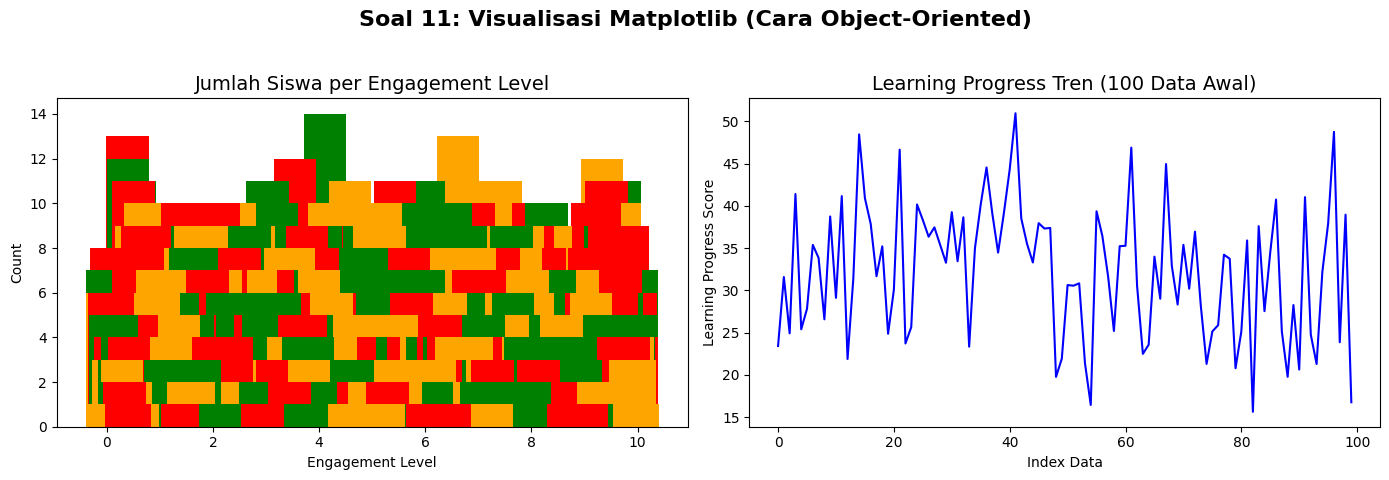

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

counts_engagement = df['engagement_level'].value_counts()
axes[0].bar(counts_engagement.index, counts_engagement.values, color=['green', 'orange', 'red'])
axes[0].set_title('Jumlah Siswa per Engagement Level', fontsize=14)
axes[0].set_xlabel('Engagement Level')
axes[0].set_ylabel('Count')

axes[1].plot(df.index[:100], df['learning_progress'].head(100), color='blue', linestyle='-')
axes[1].set_title('Learning Progress Tren (100 Data Awal)', fontsize=14)
axes[1].set_xlabel('Index Data')
axes[1].set_ylabel('Learning Progress Score')

fig.suptitle('Soal 11: Visualisasi Matplotlib (Cara Object-Oriented)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
print("\n12. Deskripsi Dataset")

print("\n--- Deskripsi Data Numerik ---")
print(df.describe())

print("\n--- Deskripsi Data Kategori ---")

kategori_cols = df.select_dtypes(include=['object', 'category']).columns
if len(kategori_cols) > 0:
    for col in kategori_cols:
        print(f"\nKolom: {col}")

        print(df[col].value_counts().head(10))
else:
    print("Tidak ditemukan kolom kategori (non-numerik) yang relevan.")


12. Deskripsi Dataset

--- Deskripsi Data Numerik ---
        student_id          age  engagement_level  time_spent_on_task  \
count  5000.000000  5000.000000       5000.000000          5000.00000   
mean    250.500000    13.468400          4.942076           314.99840   
std     144.351715     2.276673          2.880519           165.75942   
min       1.000000    10.000000          0.000000            30.00000   
25%     125.750000    11.000000          2.457500           171.00000   
50%     250.500000    13.000000          4.880000           315.00000   
75%     375.250000    15.000000          7.420000           459.00000   
max     500.000000    17.000000         10.000000           599.00000   

       accuracy_of_responses  emotion_score  frustration_level  \
count            5000.000000    5000.000000        5000.000000   
mean               74.648600       0.009420           5.112800   
std                14.552233       0.579803           3.141409   
min                50.0

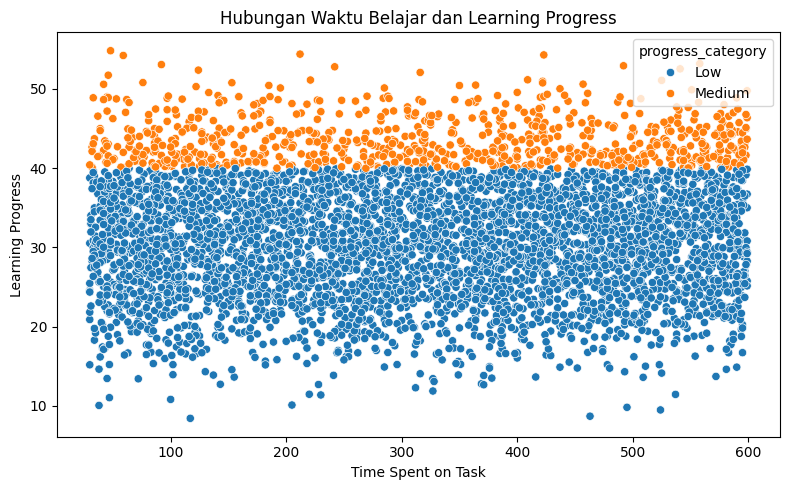

In [ ]:

plt.figure(figsize=(8,5))

sns.scatterplot(
    data=df,
    x="time_spent_on_task",
    y="learning_progress",
    hue="progress_category"
)

plt.title("Hubungan Waktu Belajar dan Learning Progress")
plt.xlabel("Time Spent on Task")
plt.ylabel("Learning Progress")
plt.tight_layout()
plt.show()